In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r"F:\Git learing\My-projects\Customer Segmantation\Customer_Segmentation_Dataset.xlsx")
data.shape

(5000, 24)

In [3]:
features = data[['Age', 'Income', 'Shopping_Frequency', 'Website_Visits', 'Average_Order_Value', 'Products_Purchased', 'Email_Open_Rate', 'Click_Through_Rate', 'Loyalty_Points']]

In [4]:
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   Income               5000 non-null   float64
 2   Shopping_Frequency   5000 non-null   int64  
 3   Website_Visits       5000 non-null   int64  
 4   Average_Order_Value  5000 non-null   float64
 5   Products_Purchased   5000 non-null   int64  
 6   Email_Open_Rate      5000 non-null   float64
 7   Click_Through_Rate   5000 non-null   float64
 8   Loyalty_Points       5000 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 351.7 KB
None


In [5]:
features.fillna(features.mean(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_10292\575749625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.mean(), inplace=True)


In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
print(scaled_features)

[[ 0.90295821  1.44711966  0.08976956 ...  1.18943646 -0.29955624
   1.44653352]
 [-1.26691894 -1.12554698 -0.94333105 ... -1.57259997  1.06161884
  -0.699951  ]
 [-1.66144205 -0.74365068  0.7785033  ...  0.87870737  1.37573617
   1.32235673]
 ...
 [-0.54362655  0.74319395 -0.80558431 ... -0.39873448  0.85220729
   0.12630226]
 [-1.66144205  1.34553421  1.26061691 ... -1.12376905  0.43338419
   1.13472696]
 [-0.41211885 -0.55983638 -0.80558431 ...  1.60374193 -0.6485755
  -1.35085571]]


In [8]:
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

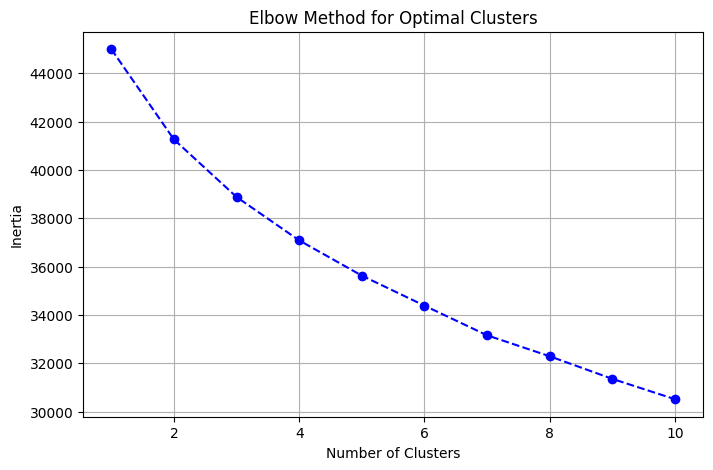

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [10]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

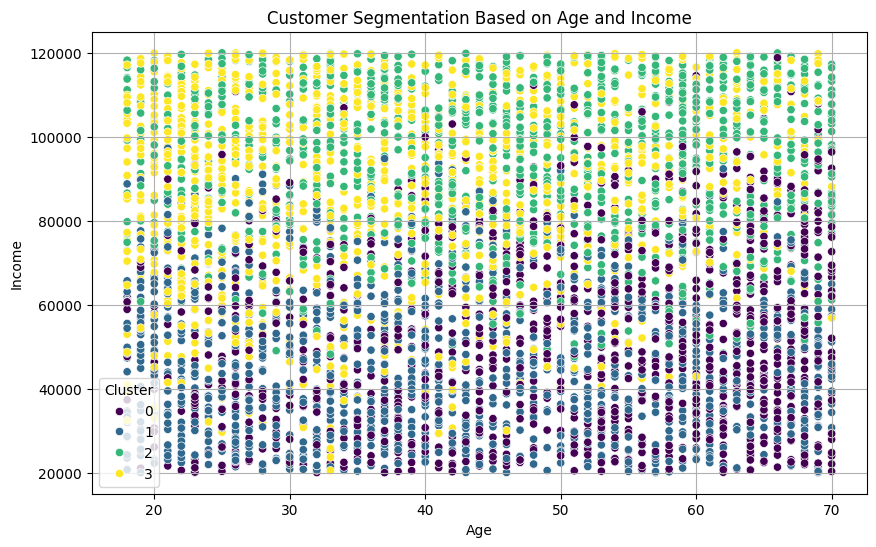

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features['Age'], y=features['Income'], hue=data['Cluster'], palette='viridis')
plt.title('Customer Segmentation Based on Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.grid()
plt.show()


In [12]:
data[['Customer_ID', 'Cluster']].head()

,Customer_ID,Cluster
0,CUST00001,2
1,CUST00002,1
2,CUST00003,1
3,CUST00004,0
4,CUST00005,0
